<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Python\python.exe -m pip install --upgrade pip' command.


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.isna()
#NaN'ов в датасете нет


#for i in range(5282):
#    try:
#        float(data["TotalSpent"][i])
#    except:
#        print(i)

for i in (1048, 1707, 2543,3078,3697,4002,4326,4551,4598):
    data.at[i,"TotalSpent"] = 0.0

data["TotalSpent"] = data["TotalSpent"].apply(pd.to_numeric)

Мы увидели, что числовой признак TotalSpent имеет тип object, поэтому надо его переделать в числовой тип. С помощью цикла мы нашли строки, которые невозможно конвертировать в float(1048, 1707, 2543,3078,3697,4002,4326,4551,4598). Заполнили эти ячейки нулями. Преобразовали строку TotalSpent в тип float. Теперь можно работать с данными)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

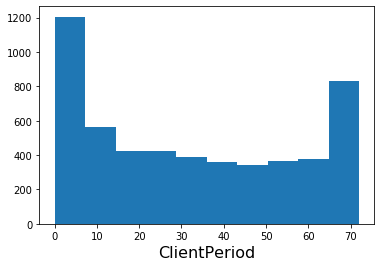

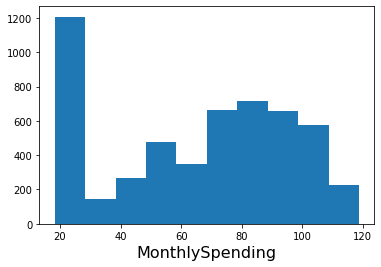

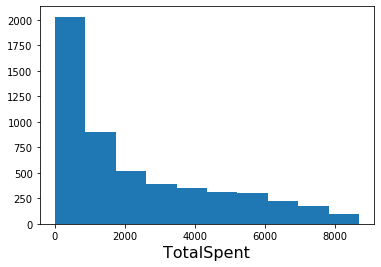

In [7]:
for i in num_cols:
    plt.subplots(1)
    plt.hist(data[i])
    plt.xlabel(i, fontsize=16)
plt.show()

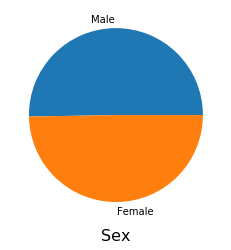

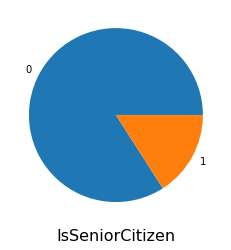

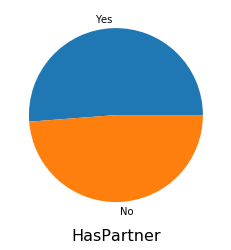

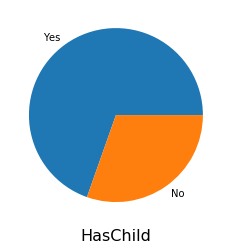

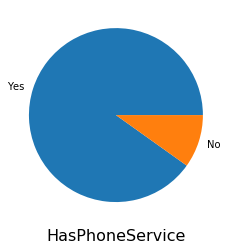

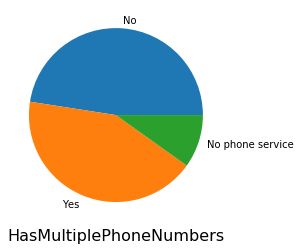

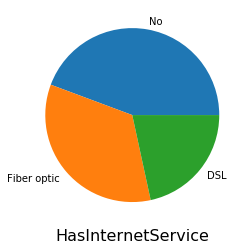

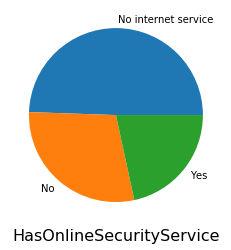

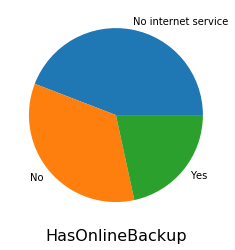

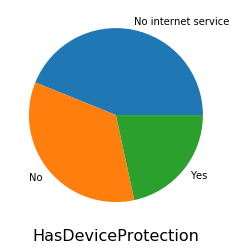

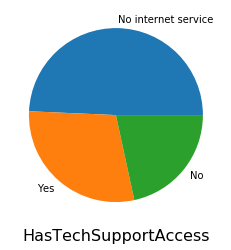

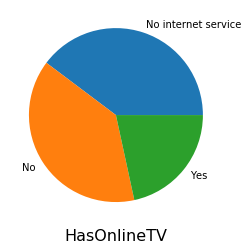

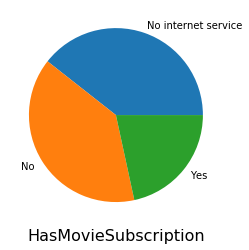

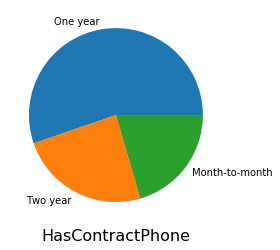

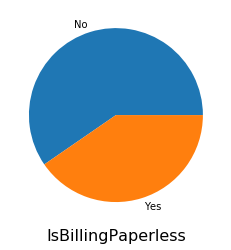

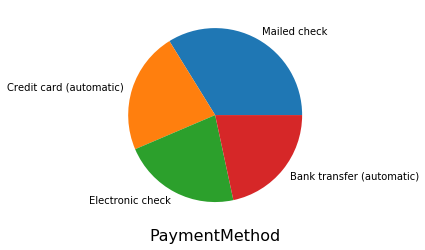

In [8]:
for i in cat_cols:
    plt.subplots(1)
    plt.pie(data[i].value_counts(), labels=data[i].unique(),)
    plt.xlabel(i, fontsize=16)
plt.show()

In [9]:
for i in cat_cols:
    print(data[i].value_counts())

Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64
No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64
No    

In [10]:
print((data["Churn"]==0).sum()/52.82)

73.79780386217342


Мы видим, что значение целевой переменной соотносится приблизительно, как 2:1. Классы сбалансированы. Поэтому спокойно можно работать с этими данными.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [11]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [13]:
for i in num_cols:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())
for i in cat_cols:
    y = pd.get_dummies(data[i], prefix=i)
    data = pd.concat([data,y],axis=1)
    data.drop(i, axis=1, inplace=True)
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.763889,0.012438,0.118178,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.000000,0.075622,0.215572,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0.013889,0.573632,0.008739,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0.444444,0.607463,0.295919,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0.833333,0.965174,0.778193,0,1,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0


In [26]:
y = data["Churn"]
X = data.drop('Churn', 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.99,random_state=12)

In [27]:
searchCV = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-10, 10)))
    ,penalty='l2'
    ,scoring='roc_auc'
    ,random_state=777
    ,max_iter=1000000
    ,fit_intercept=True
    ,solver='newton-cg'
    ,tol=13
    ,refit=True
)
searchCV.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     max_iter=1000000, random_state=777, scoring='roc_auc',
                     solver='newton-cg', tol=13)

In [28]:
y_test_predict = searchCV.predict_proba(X_test)[:,1]
test = roc_auc_score(y_test, y_test_predict)
test

0.9065934065934066

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0,84605060... при параметре равном 1.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [29]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Python\python.exe -m pip install --upgrade pip' command.


In [30]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=5,
                          learning_rate=0.59,
                          depth=4, eval_metric = "AUC", l2_leaf_reg=11)
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
test = roc_auc_score(y_test, y_test_predict)
test

0:	total: 1.74ms	remaining: 6.95ms
1:	total: 3.37ms	remaining: 5.06ms
2:	total: 4.98ms	remaining: 3.32ms
3:	total: 6.55ms	remaining: 1.64ms
4:	total: 8.08ms	remaining: 0us


0.9276556776556777

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

После куча попыток было получено, что 4 итерации, лернинг рейт равный 1, и глубина равная 4 - идеальная комбинация. После поднятия какого-либо аргумента происходит переобучение. Разделение данных на 0,5455 - также подобранное число.

# Предсказания

In [31]:
best_model = searchCV
X_tst = pd.read_csv('./test.csv')
X_tst.at[177,"TotalSpent"] = 0.0
X_tst.at[767,"TotalSpent"] = 0.0
X_tst["TotalSpent"] = X_tst["TotalSpent"].apply(pd.to_numeric)

In [32]:
submissions = pd.read_csv('./submission.csv')
for i in num_cols:
    X_tst[i] = ((X_tst[i]-X_tst[i].min())/(X_tst[i].max()-X_tst[i].min()))
for i in cat_cols:
    y = pd.get_dummies(X_tst[i], prefix=i)
    X_tst = pd.concat([X_tst,y],axis=1)
    X_tst.drop(i, axis=1, inplace=True)
print(best_model.predict(X_tst))
submissions["Churn"] = best_model.predict_proba(X_tst)[:,1]
print(submissions)
submissions["Churn"].to_csv('./my_submission.csv')

[0 1 1 ... 1 1 0]
        Id     Churn
0        0  0.051687
1        1  0.711548
2        2  0.696164
3        3  0.007228
4        4  0.005350
...    ...       ...
1756  1756  0.063711
1757  1757  0.024445
1758  1758  0.783452
1759  1759  0.652215
1760  1760  0.017810

[1761 rows x 2 columns]


D:\Python\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.